# 2. Linear Regression Analysis

## Setup

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [2]:
# Load data
ames_clean = pd.read_csv('data/Ames_Housing_Price_Data_clean.csv', index_col=0)

In [6]:
# Create the independent variables and the target
X = ames_clean.drop('SalePrice', axis=1)
y = ames_clean['SalePrice']

In [7]:
# Categorize columns of the independent variables
numeric_columns = X.select_dtypes(['int64', 'float64']).columns
categorical_columns = X.columns.difference(numeric_columns)

## Key Assumptions of Linear Regression

Linear Regression has several key assumptions:
1. **Linearity** - there should be a linear relationship between the independent (predictor) variables and the dependent (response) variable
2. **Independence of Errors** - residuals should be independent of each other with no correlation
3. **Homoscedasticity** - residuals should have constant variance across the range of predicted values
4. **Normality of errors** - residuals should be approximiately normally distributed
5. **No or little multicollinearity** - independent variables should not be highly correlated with each other

## Check for Multicollinearity

We will check for multicollinearity first given the large number of features

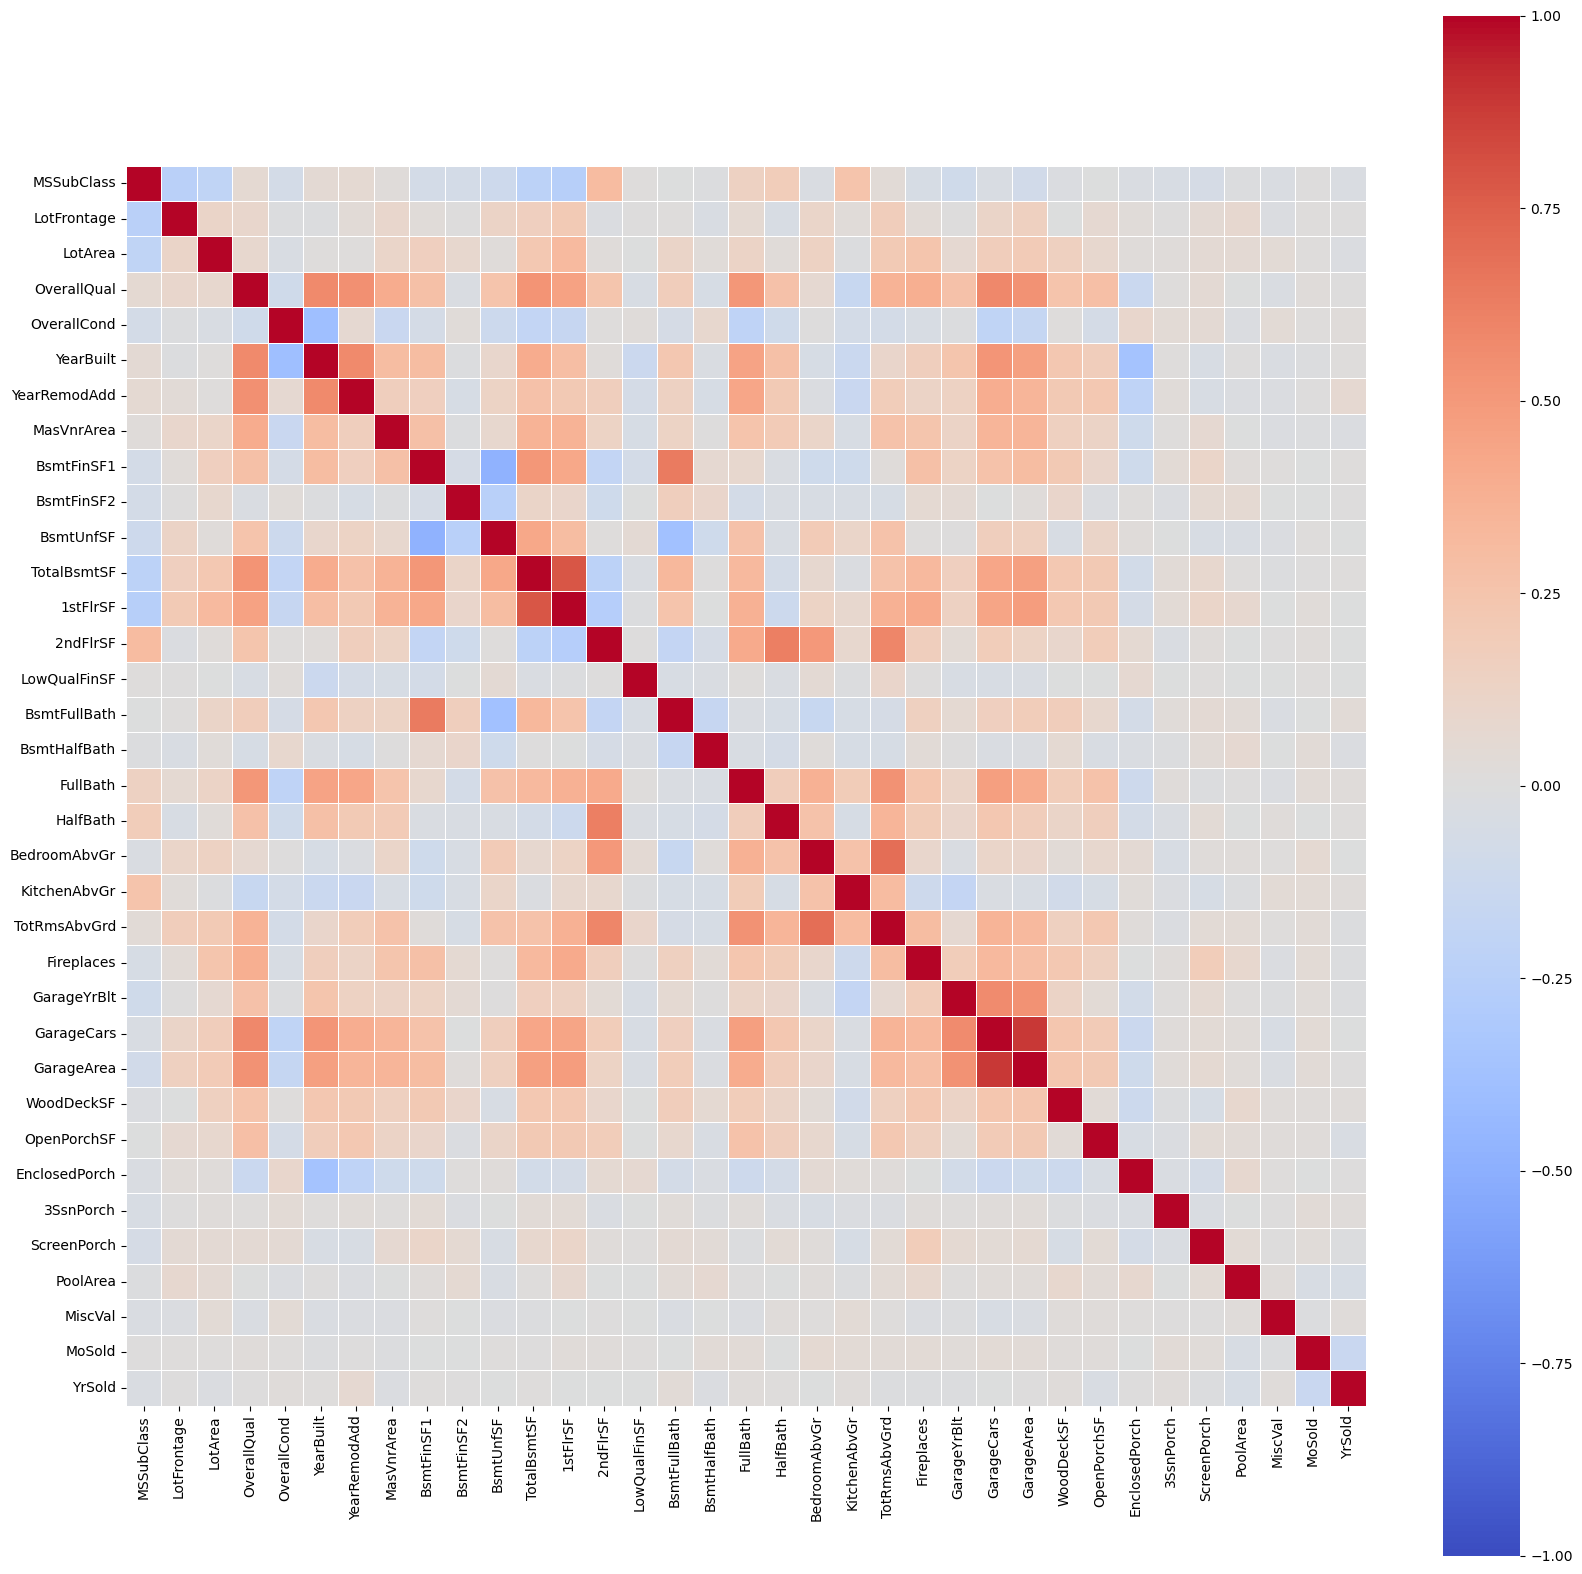

In [8]:
# Plot the correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, square=True, cmap='coolwarm', fmt='.2f', vmax=1.0, vmin=-1.0, linewidths=0.5)
plt.show()

In [11]:
# Calculate the variance inflation factor (VIF) for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X[numeric_columns].values, i) for i in range(X[numeric_columns].shape[1])]

# Print the column names and their VIF values
vif = vif.assign(Feature=X[numeric_columns].columns)
vif.sort_values(by='VIF', ascending=False, inplace=True)
print(vif)

             VIF        Feature
8            inf     BsmtFinSF1
9            inf     BsmtFinSF2
10           inf      BsmtUnfSF
11           inf    TotalBsmtSF
34  2.187306e+04         YrSold
6   2.050288e+04   YearRemodAdd
5   1.601022e+04      YearBuilt
21  8.192805e+01   TotRmsAbvGrd
3   6.161835e+01    OverallQual
12  5.561200e+01       1stFlrSF
20  4.355915e+01   KitchenAbvGr
4   4.122175e+01    OverallCond
24  4.079507e+01     GarageCars
23  3.375221e+01    GarageYrBlt
25  3.265976e+01     GarageArea
19  3.150878e+01   BedroomAbvGr
17  2.513003e+01       FullBath
13  9.450310e+00       2ndFlrSF
33  6.415666e+00         MoSold
1   4.388902e+00    LotFrontage
0   4.243464e+00     MSSubClass
15  3.624166e+00   BsmtFullBath
18  3.451496e+00       HalfBath
2   3.116483e+00        LotArea
22  2.926793e+00     Fireplaces
26  1.903430e+00     WoodDeckSF
7   1.810977e+00     MasVnrArea
27  1.778288e+00    OpenPorchSF
28  1.374264e+00  EnclosedPorch
16  1.249891e+00   BsmtHalfBath
30  1.18

/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
